# Python-Beispiele für das Zürich Tourismus API

## Inhaltsverzeichnis

1. [Restaurants vom Zürich Tourismus API auf einer Karte darstellen](#Restaurants-vom-Zürich-Tourismus-API-auf-einer-Karte-darstellen)
1. [CSV Download](#CSV-Download)
1. [Bilder zu einem Thema](#Bilder-zu-einem-Thema)
1. [Kategorien der Elemente im API](#Kategorien-der-Elemente-im-API)

In [140]:
import requests
import pandas as pd
import folium
import branca
import anytree

In [141]:
SSL_VERIFY = True
# evtl. SSL_VERIFY auf False setzen wenn die Verbindung zu https://www.zuerich.com nicht klappt (z.B. wegen Proxy)
# Um die SSL Verifikation auszustellen, bitte die nächste Zeile einkommentieren ("#" entfernen)
SSL_VERIFY = False
if not SSL_VERIFY:
    import urllib3
    urllib3.disable_warnings()
    
def get_de(field):
    try:
        return field['de']
    except (KeyError, TypeError):
        try:
            return field['en']
        except (KeyError, TypeError):
            return field

## Restaurants vom Zürich Tourismus API auf einer Karte darstellen

### Daten von der API laden

**Alle Elemente mit dem Tag "gastronomy" vom API abrufen**:

In [142]:
headers = {'Accept': 'application/json'}
r = requests.get('https://www.zuerich.com/en/data/gastronomy', headers=headers, verify=SSL_VERIFY)

**Die JSON Daten vom API in ein Python dictionary umwandeln:**

In [145]:
data = r.json()
data

[{'id': '502363',
  '@context': 'https://schema.org/',
  '@type': 'LocalBusiness',
  'copyright': {'en': 'Zurich Tourism www.zuerich.com',
   'de': 'Zürich Tourismus www.zuerich.com',
   'it': 'Zürich Tourismo www.zuerich.com',
   'fr': 'Zürich Tourisme www.zuerich.com'},
  'cc': 'BY-SA',
  'category': ['Restaurants', 'Italian'],
  'name': {'de': 'Rosso Arancio',
   'en': 'Rosso Arancio',
   'fr': 'Rosso Arancio',
   'it': 'Rosso Arancio'},
  'disambiguatingDescription': {'de': 'Das «Rosso Arancio» am Stauffacher ist bisher noch ein Geheimtipp für wahre Gelati-Liebhaber. ',
   'en': 'The Rosso Arancio at Stauffacher is (still) an insider tip for true gelati lovers.',
   'fr': 'Le « Rosso Arancio » du Stauffacher est une vraie trouvaille pour les amateurs de glaces. ',
   'it': 'La gelateria Rosso Arancio alla fermata Stauffacher è ancora una chicca segreta per veri amanti del gelato. '},
  'description': {'de': '<p>Ein richtiger Geheimtipp ist bisher der kleine Laden Rosso Arancio nahe

**Die Daten haben viele mehrsprachige Felder, der folgende Code holt sich jeweils die deutschen Inhalte:**

In [146]:
de_data = [{k: get_de(v) for (k,v) in f.items()} for f in data]
de_data

[{'id': '502363',
  '@context': 'https://schema.org/',
  '@type': 'LocalBusiness',
  'copyright': 'Zürich Tourismus www.zuerich.com',
  'cc': 'BY-SA',
  'category': ['Restaurants', 'Italian'],
  'name': 'Rosso Arancio',
  'disambiguatingDescription': 'Das «Rosso Arancio» am Stauffacher ist bisher noch ein Geheimtipp für wahre Gelati-Liebhaber. ',
  'description': '<p>Ein richtiger Geheimtipp ist bisher der kleine Laden Rosso Arancio nahe dem Verkehrsknotenpunkt Stauffacher. Hier ist ein richtiger Könner am Werk, denn Besitzer Jimmy Begaj hat sein Handwerk in Italien gelernt. Und das schmeckt der Kenner.</p><p>Nur die besten Zutaten werden bei &laquo;Rosso Arancio&raquo; zu klassischen Eissorten verarbeitet. So werden Eier und Milch aus zertifizierten Schweizer Betrieben verwendet, während Orangen aus Sizilien oder piemontesische Haselnüsse für die wahren Geschmacksexplosionen sorgen. Stetig tüftelt Jimmy an neuen Kreationen und hört auch gerne auf Wünsche von seinen Gästen.</p><p>Tägli

**Die Daten in einem pandas DataFrame ablegen:**

In [147]:
df = pd.DataFrame(de_data)
df

@context          @type  \
0    https://schema.org/  LocalBusiness   
1    https://schema.org/  LocalBusiness   
2    https://schema.org/  LocalBusiness   
3    https://schema.org/  LocalBusiness   
4    https://schema.org/  LocalBusiness   
5    https://schema.org/  LocalBusiness   
6    https://schema.org/  LocalBusiness   
7    https://schema.org/  LocalBusiness   
8    https://schema.org/  LocalBusiness   
9    https://schema.org/  LocalBusiness   
10   https://schema.org/  LocalBusiness   
11   https://schema.org/  LocalBusiness   
12   https://schema.org/  LocalBusiness   
13   https://schema.org/  LocalBusiness   
14   https://schema.org/  LocalBusiness   
15   https://schema.org/  LocalBusiness   
16   https://schema.org/  LocalBusiness   
17   https://schema.org/  LocalBusiness   
18   https://schema.org/  LocalBusiness   
19   https://schema.org/  LocalBusiness   
20   https://schema.org/  LocalBusiness   
21   https://schema.org/  LocalBusiness   
22   https://schema.org/  LocalBusiness   
23   https://schema.org/  LocalBusiness   
24   https://schema.org/  LocalBusiness   
25   https://schema.org/  LocalBusiness   
26   https://schema.org/  LocalBusiness   
27   https://schema.org/  LocalBusiness   
28   https://schema.org/  LocalBusiness   
29   https://schema.org/  LocalBusiness   
..                   ...            ...   
635  https://schema.org/  LocalBusiness   
636  https://schema.org/  LocalBusiness   
637  https://schema.org/  LocalBusiness   
638  https://schema.org/  LocalBusiness   
639  https://schema.org/  LocalBusiness   
640  https://schema.org/  LocalBusiness   
641  https://schema.org/  LocalBusiness   
642  https://schema.org/  LocalBusiness   
643  https://schema.org/  LocalBusiness   
644  https://schema.org/  LocalBusiness   
645  https://schema.org/  LocalBusiness   
646  https://schema.org/  LocalBusiness   
647  https://schema.org/  LocalBusiness   
648  https://schema.org/  LocalBusiness   
649  https://schema.org/  LocalBusiness   
650  https://schema.org/  LocalBusiness   
651  https://schema.org/  LocalBusiness   
652  https://schema.org/  LocalBusiness   
653  https://schema.org/  LocalBusiness   
654  https://schema.org/  LocalBusiness   
655  https://schema.org/  LocalBusiness   
656  https://schema.org/  LocalBusiness   
657  https://schema.org/  LocalBusiness   
658  https://schema.org/  LocalBusiness   
659  https://schema.org/  LocalBusiness   
660  https://schema.org/  LocalBusiness   
661  https://schema.org/  LocalBusiness   
662  https://schema.org/  LocalBusiness   
663  https://schema.org/  LocalBusiness   
664  https://schema.org/  LocalBusiness   

                                               address  \
0    {'addressCountry': 'CH', 'addressLocality': 'Z...   
1    {'addressCountry': 'CH', 'addressLocality': 'P...   
2    {'addressCountry': 'CH', 'addressLocality': 'Z...   
3    {'addressCountry': 'CH', 'addressLocality': 'Z...   
4    {'addressCountry': 'CH', 'addressLocality': 'Z...   
5    {'addressCountry': 'CH', 'addressLocality': 'Z...   
6    {'addressCountry': 'CH', 'addressLocality': 'Z...   
7    {'addressCountry': 'CH', 'addressLocality': 'Z...   
8    {'addressCountry': 'CH', 'addressLocality': 'Z...   
9    {'addressCountry': 'CH', 'addressLocality': 'Z...   
10   {'addressCountry': 'CH', 'addressLocality': 'Z...   
11   {'addressCountry': 'CH', 'addressLocality': 'Z...   
12   {'addressCountry': 'CH', 'addressLocality': 'Z...   
13   {'addressCountry': 'CH', 'addressLocality': 'Z...   
14   {'addressCountry': 'CH', 'addressLocality': 'Z...   
15   {'addressCountry': 'CH', 'addressLocality': 'Z...   
16   {'addressCountry': 'CH', 'addressLocality': 'Z...   
17   {'addressCountry': 'CH', 'addressLocality': 'Z...   
18   {'addressCountry': 'CH', 'addressLocality': 'Z...   
19   {'addressCountry': 'CH', 'addressLocality': 'Z...   
20   {'addressCountry': 'CH', 'addressLocality': 'Z...   
21   {'addressCountry': 'CH', 'addressLocality': 'Z...   
22   {'addressC

### Daten zur Karte hinzufügen

`folium` ist ein Python Wrapper für OpenLayers. Der nachfolgende Code erstellt eine neue Karte und verwendet den Übersichtsplan als Hintergrund (eingebunden als WMS).

In [148]:
m = folium.Map(location=[47.36, 8.53], zoom_start=13, tiles=None)
folium.raster_layers.WmsTileLayer(
    url='https://www.ogd.stadt-zuerich.ch/wms/WMS-ZH-STZH-OGD?LAYERS=OGD-STZH&VERSION=1.3.0',
    layers='UebersichtsplanAktuell',
    name='Zürich - Basiskarte',
    fmt='image/png',
    overlay=False,
    control=False,
    autoZindex=False,
).add_to(m)

Nun iterieren wir über das pandas DataFrame und erstellen einen Marker für jedes Restaurant. Falls vorhanden wird ein Photo in den Beschreibungstext eingefügt.

In [149]:
gastro = folium.FeatureGroup("Restaurants")
isna = df.isna()
for i, row in df.iterrows():
    print(row['geo'])
    print(row['name'])
    geo = row['geo']
    if not isna.geo[i]:
        print("%s, %s, %s" % (float(geo['latitude']), float(geo['longitude']), row['name']))
        
        try:
            photo = row['photo'][0]['url']
            photo_html = f'<img src="{photo}" style="width:300px">'
        except (IndexError, KeyError):
            photo_html = ''
        html = (
            f'<h2>{row["name"]}</h2>'
            f'{photo_html}'
            f'<p>{row["disambiguatingDescription"]}</p>'
        )
        #popup = folium.Popup(branca.element.IFrame(html=html, width=420))
        gastro.add_child(folium.Marker(location=[float(geo['latitude']), float(geo['longitude'])], popup=html)) 
m.add_child(gastro)

{'latitude': '47.373912700000', 'longitude': '8.528367800000'}
Rosso Arancio
47.3739127, 8.5283678, Rosso Arancio
{'latitude': '47.216891688452', 'longitude': '8.778442838714'}
Inselwirtschaft Ufenau
47.216891688452, 8.778442838714, Inselwirtschaft Ufenau
{'latitude': '47.373071000000', 'longitude': '8.518197209078'}
The High Heel Gourmet Café
47.373071, 8.518197209078, The High Heel Gourmet Café
{'latitude': '47.373722600000', 'longitude': '8.542980700000'}
01 Bar
47.3737226, 8.5429807, 01 Bar
{'latitude': '47.371817373401', 'longitude': '8.536452199933'}
Pelikanbar
47.371817373401, 8.536452199933, Pelikanbar
{'latitude': '47.371664099329', 'longitude': '8.536468103584'}
Restaurant Kaufleuten
47.371664099329, 8.536468103584, Restaurant Kaufleuten
{'latitude': '47.359885270961', 'longitude': '8.535255970645'}
Samigo Amusement
47.359885270961, 8.535255970645, Samigo Amusement
{'latitude': '47.368130470876', 'longitude': '8.539601142062'}
Kafi Züri
47.368130470876, 8.539601142062, Kafi Z

{'latitude': '47.372415638353', 'longitude': '8.540343895610'}
AuGust 
47.372415638353, 8.54034389561, AuGust 
{'latitude': '47.373335132894', 'longitude': '8.537192300018'}
Gärtnerei
47.373335132894, 8.537192300018, Gärtnerei
{'latitude': '47.226486377349', 'longitude': '8.819178298172'}
Manora
47.226486377349, 8.819178298172, Manora
{'latitude': '47.366733407959', 'longitude': '8.545582249816'}
Fondue Tram
47.366733407959, 8.545582249816, Fondue Tram
{'latitude': '47.375033100000', 'longitude': '8.544443600000'}
Walliser Keller «SwissAlpeChuchi»
47.3750331, 8.5444436, Walliser Keller «SwissAlpeChuchi»
{'latitude': '47.410743800000', 'longitude': '8.540825200000'}
Perron 9
47.4107438, 8.5408252, Perron 9
{'latitude': '47.376805500000', 'longitude': '8.540870800000'}
Heineken Newsbar
47.3768055, 8.5408708, Heineken Newsbar
{'latitude': '47.440154700000', 'longitude': '8.557808300000'}
Runway 34
47.4401547, 8.5578083, Runway 34
{'latitude': '47.371928500000', 'longitude': '8.53502140000

{'latitude': '47.377295000000', 'longitude': '8.527775400000'}
The Bite
47.377295, 8.5277754, The Bite
{'latitude': '47.371519000000', 'longitude': '8.540287600000'}
Tao’s Restaurant 
47.371519, 8.5402876, Tao’s Restaurant 
{'latitude': '47.372057100000', 'longitude': '8.540392100000'}
Taverna Catalana
47.3720571, 8.5403921, Taverna Catalana
{'latitude': '47.264459500000', 'longitude': '8.656025700000'}
Taverne – Hotel Hirschen
47.2644595, 8.6560257, Taverne – Hotel Hirschen
{'latitude': '47.498177000000', 'longitude': '8.729294600000'}
Tea&Room Teekult
47.498177, 8.7292946, Tea&Room Teekult
{'latitude': '47.403256800000', 'longitude': '8.516186400000'}
Tessin Grotto
47.4032568, 8.5161864, Tessin Grotto
{'latitude': '47.228376500000', 'longitude': '8.819170700000'}
Thai Orchid Gourmet
47.2283765, 8.8191707, Thai Orchid Gourmet
{'latitude': '47.193490800000', 'longitude': '8.851700100000'}
The Steakhouse
47.1934908, 8.8517001, The Steakhouse
{'latitude': '47.358022900000', 'longitude': 

**Hier ist die fertige Karte:**

In [150]:
folium.LayerControl().add_to(m)
m

## CSV Download

Für die weitere Verarbeitung kann es nützlich sein, die Daten aus dem API in tabellarischer Form zu haben.
Der nachfolgende Code wandelt das JSON vom API in ein CSV um (ohne jedoch alle Attribute zu _flatten_).

In [151]:
# download CSV
import base64
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(None, index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<h3><a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a><h3>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

def generate_csv_download(endpoint, name):
    headers = {'Accept': 'application/json'}
    r = requests.get(endpoint, headers=headers, verify=SSL_VERIFY)
    data = r.json()
    df = pd.DataFrame(data)
    return create_download_link(df, f'Download {name}_data.csv', f'data_{name}.csv')

In [152]:
generate_csv_download('https://zuerich.com/en/data/attractions', 'attractions')

## Bilder zu einem Thema

Das Zürich Tourismus API bietet sehr hochwertige Bilder an, die sich zur Illustration eigenen.

### Lade alle Einträge zum Thema "Sehenswürdigkeiten" (engl. _attractions_):

In [154]:
headers = {'Accept': 'application/json'}
r = requests.get('https://zuerich.com/en/data/attractions', headers=headers, verify=SSL_VERIFY)
data = r.json()

Alle Bilder zum Thema "einsammeln", diese sind in den Attributen `image` und `photo` hinterlegt:

In [155]:
images = []
images.extend([d['image']['url'] for d in data])
images.extend([p['url'] for y in [d['photo'] for d in data] for p in y])
images

['https://cdn.zuerich.com/sites/default/files/web_zuerich_grandtour_winterthur_1600x900_pt_4192_1.jpg',
 'https://cdn.zuerich.com/sites/default/files/web_zuerich_eth_hauptgebaeude_1280x960_24299.jpg',
 'https://cdn.zuerich.com/sites/default/files/web_zuerich_mfo_park_1280x960_24302.jpg',
 'https://cdn.zuerich.com/sites/default/files/web_zuerich_hunziker_areal_1280x960_24295.jpg',
 'https://cdn.zuerich.com/sites/default/files/web_zuerich_zhd_toni_campus_1280x960_22614.jpg',
 'https://cdn.zuerich.com/sites/default/files/web_zuerich_architektur_landesmuseum_22616.jpg',
 'https://cdn.zuerich.com/sites/default/files/web_zuerich_architektur_studentenwohnheim_eth_22611.jpg',
 'https://cdn.zuerich.com/sites/default/files/web_zuerich_architektur_rechtswissenschaft_bibliothek_1280x960_22624.jpg',
 'https://cdn.zuerich.com/sites/default/files/web_zuerich_architektur_schulhaus_leutschenbach_22607.jpg',
 'https://cdn.zuerich.com/sites/default/files/web_zuerich_architektur_kiss_22606.jpg',
 'https:/

### Anzeige von zufälligen Bildern zum Thema:

In [156]:
from IPython.display import HTML, display
import random

# wähle zufällig 8 Einträge aus der Liste aus
sample = random.sample(images, k=8)

def img_html(url):
     return '<img src="{}" style="display:inline;margin:1px;width:200px"/>'.format(url)

display(HTML(''.join([img_html(url) for url in sample])))

## Kategorien der Elemente im API

Dieses Beispiel zeigt, wie man sich durch API "hangeln" kann, d.h. den Links zu folgen und zu sehen, welche Elemente es gibt.

In [158]:
from anytree import Node, RenderTree
from urllib.parse import urljoin

In [162]:
headers = {'Accept': 'application/json'}
base_url = 'https://www.zuerich.com'
data_url = urljoin(base_url, '/data')
r = requests.get(data_url, headers=headers, verify=SSL_VERIFY)
data = r.json()
data

[{'id': '74',
  'parent': '0',
  'name': {'de': 'Gastronomie',
   'en': 'Gastronomy',
   'fr': 'Gastronomie',
   'it': 'Gastronomia'},
  'path': '/data/gastronomy'},
 {'id': '101',
  'parent': '74',
  'name': {'de': 'Restaurants',
   'en': 'Restaurants',
   'fr': 'Restaurants',
   'it': 'Ristoranti'},
  'path': '/data/gastronomy/restaurants'},
 {'id': '165',
  'parent': '101',
  'name': {'de': 'Küche', 'en': 'Cuisine', 'fr': 'Cuisine', 'it': 'Cucina'},
  'path': '/data/gastronomy/restaurants/cuisine'},
 {'id': '193',
  'parent': '165',
  'name': {'de': 'Amerikanisch',
   'en': 'American',
   'fr': 'Américaine',
   'it': 'Americano'},
  'path': '/data/gastronomy/restaurants/cuisine/american'},
 {'id': '194',
  'parent': '165',
  'name': {'de': 'Gourmet', 'en': 'Gourmet', 'fr': 'Gourmet', 'it': 'Gourmet'},
  'path': '/data/gastronomy/restaurants/cuisine/gourmet'},
 {'id': '195',
  'parent': '165',
  'name': {'de': 'Grill', 'en': 'BBQ', 'fr': 'Barbecue', 'it': 'Griglia'},
  'path': '/data

### Baum der Kategorien

Mit dem Aufruf von `https://www.zuerich.com/de/data` bekommt man das oberste Level des Baums (d.h. eine Liste aller Kategorien inkl. ihrer Hierarchie). Damit können wir uns einen Python-Baum basteln:

In [164]:
# Finde die direkten Kind-Nodes des angegebenem Eltern-Nodes (rekursiv)
def find_children(data, parent):
    children = [e for e in data if e['parent'] == parent.id]
    for c in children:
        node = Node(id=c['id'], name=c['name'].get('de', c['name']), urlpath=c['path'], parent=parent)
        find_children(data, node)

root = Node(id='0', name="Root", urlpath="/data")
find_children(data, root)

# Zeige den Baum an
for pre, _, node in RenderTree(root):
    print("%s%s" % (pre, node.name))

Root
├── Gastronomie
│   ├── Restaurants
│   │   ├── Küche
│   │   │   ├── Amerikanisch
│   │   │   ├── Gourmet
│   │   │   ├── Grill
│   │   │   │   └── Bratwurst
│   │   │   ├── Fisch
│   │   │   ├── Vegetarisch
│   │   │   ├── Vegan
│   │   │   ├── Schweizer Spezialitäten
│   │   │   │   ├── Raclette
│   │   │   │   ├── Zürcher Geschnetzeltes
│   │   │   │   ├── Rösti
│   │   │   │   └── Fondue
│   │   │   ├── Italienisch
│   │   │   │   ├── Pizza
│   │   │   │   └── Pasta
│   │   │   ├── Spanisch
│   │   │   ├── Asiatisch
│   │   │   │   └── Sushi
│   │   │   ├── Orientalisch
│   │   │   ├── Französisch
│   │   │   ├── Mexikanisch
│   │   │   ├── Mediterran
│   │   │   ├── Bistro
│   │   │   └── International
│   │   ├── Mahlzeit
│   │   │   ├── Frühstück
│   │   │   ├── Brunch
│   │   │   ├── Mittagessen
│   │   │   └── Abendessen
│   │   ├── Online Reservieren
│   │   ├── Kaffee & Teeraum
│   │   │   ├── Kaffee
│   │   │   ├── Konditorei
│   │   │   ├── Kuchen
│   │   │   └── Tee

### Anzahl Elemente pro Kategorie

In [165]:
# Jetzt holen wir via API die Anzahl Elemente für jede Kategorie
# ACHTUNG: es wird für jede Kategorie ein Request gemacht, das dauert einige Minuten!
de_data = [{k: get_de(v) for (k,v) in f.items()} for f in data]
categories = pd.DataFrame(de_data)

def get_category_count(path):
    headers = {'Accept': 'application/json'}
    base_url = 'https://www.zuerich.com'
    data_url = urljoin(base_url, path)
    r = requests.get(data_url, headers=headers, verify=SSL_VERIFY)
    return len(r.json())

categories['count'] = categories['path'].apply(get_category_count)
categories

id                     name parent  \
0     74              Gastronomie      0   
1    101              Restaurants     74   
2    165                    Küche    101   
3    193             Amerikanisch    165   
4    194                  Gourmet    165   
5    195                    Grill    165   
6    209                Bratwurst    195   
7    196                    Fisch    165   
8    197              Vegetarisch    165   
9    409                    Vegan    165   
10   184  Schweizer Spezialitäten    165   
11   202                 Raclette    184   
12   205   Zürcher Geschnetzeltes    184   
13   204                    Rösti    184   
14   203                   Fondue    184   
15   185              Italienisch    165   
16   206                    Pizza    185   
17   207                    Pasta    185   
18   186                 Spanisch    165   
19   188                Asiatisch    165   
20   208                    Sushi    188   
21   189             Orientalisch    165   
22   187              Französisch    165   
23   190              Mexikanisch    165   
24   191               Mediterran    165   
25   192                   Bistro    165   
26   415            International    165   
27   166                 Mahlzeit    101   
28   198                Frühstück    166   
29   199                   Brunch    166   
..   ...                      ...    ...   
159  150    SUP Stand Up Paddling     97   
160  151                  Pedalos     97   
161  144            Sommer Rodeln     97   
162  152  Skifahren & Snowboarden     97   
163  153      Schlitteln & Rodeln     97   
164  155     Schneeschuhwanderung     97   
165  156                Eislaufen     97   
166  157                 Langlauf     97   
167  154                  Skitour     97   
168   98                 Wellness     73   
169   99                    Natur     73   
170  158                    Berge     99   
171  160           Parks & Gärten     99   
172  159                   Wasser     99   
173  161              Zoo & Tiere     99   
174   75          Veranstaltungen      0   
175  625  Konferenzen & Kongresse     75   
176  105              Ausstellung     75   
177  406      Kinder und Familien     75   
178  404          Messen / Märkte     75   
179  407          Pop, Rock, Jazz     75   
180  412                  Theater     75   
181  413                     Oper     75   
182  414                  Klassik     75   
183  405                   Andere     75   
184  408             Traditionell     75   
185  110                    Party     75   
186  111                 Festival     75   
187  112                  Komödie     75   
188  113       Sportveranstaltung     75   

                                                  path  count  
0                                     /data/gastronomy    665  
1                         /data/gastronomy/restaurants    533  
2                 /data/gastronomy/restaurants/cuisine    457  
3        /data/gastronomy/restaurants/cuisine/american     29  
4         /data/gastronomy/restaurants/cuisine/gourmet     41  
5             /data/gastronomy/restaurants/cuisine/bbq     51  
6    /data/gastronomy/restaurants/cuisine/bbq/bratw...     11  
7            /data/gastronomy/restaurants/cuisine/fish     26  
8      /data/gastronomy/restaurants/cuisine/vegetarian     33  
9    /data/gastronomy/restaurants/cuisine/vegan+fri...     20  
10   /data/gastronomy/restaurants/cuisine/swiss+spe...    135  
11   /data/gastronomy/restaurants/cuisine/swiss+spe...      6  
12   /data/gastronomy/restaurants/cuisine/swiss+spe...     30  
13   /data/gastronomy/restaurants/cuisine/swiss+spe...      6  
14   /data/gastronomy/restaurants/cuisine/swiss+spe...     22  
15        /data/gastronomy/restaurants/cuisine/italian     66  
16   /data/gastronomy/restaurants/cuisine/italian/p...     22  
17   /data/gastronomy/restaurants/cuisine/italian/p...     36  
18        /data/gastronomy/restaurants/cuisine/spanish      8

In [166]:
# Liste aller Kategorien mit keinen Elementen (count == 0)
categories[categories['count'] == 0].sort_values(by=['id'])

id                                   name parent  \
176   105                            Ausstellung     75   
185   110                                  Party     75   
186   111                               Festival     75   
187   112                                Komödie     75   
188   113                     Sportveranstaltung     75   
87   1150                               Duration    359   
103   116                                Geführt    359   
78   1168                    Fortbewegungsmittel    359   
77    117                       Auf eigene Faust   1174   
95   1171               Kategorie Rahmenprogramm    359   
72   1174            Kategorie Touren & Ausflüge    359   
79    118                                    Bus   1168   
100  1180                          Quiz / Gaming   1171   
88   1183                          1 - 2 Stunden   1150   
89   1186                          1 - 3 Stunden   1150   
90   1189                          3 - 5 Stunden   1150   
80    119                    Boot / Schiff / SUP   1168   
91   1192                          4 - 6 Stunden   1150   
81    120                              E-Tuk-Tuk   1168   
82    121                                 Segway   1168   
83    122                                Rikscha   1168   
84    123                         Bike / E-Bikes   1168   
93    124                       Halbtagesausflug   1150   
92    125                              Ganztägig   1150   
94    126                       Mehrtagesausflug   1150   
48   1495                    Traditionell-urchig   1471   
125  1531                               Produkte     73   
71    359                      Touren & Ausflüge      0   
76    362                        Gruppenangebote   1174   
96    363                         Action & Sport   1171   
97    364                          Kulinarisches   1171   
99    365  Geführte Stadt- und Betriebsrundgänge   1171   
101   366                          Themen-Anlass   1171   
98    367                           Teambuilding   1171   
102   368                  Selbstgeführte Touren    359   
178   404                        Messen / Märkte     75   
183   405                                 Andere     75   
177   406                    Kinder und Familien     75   
179   407                        Pop, Rock, Jazz     75   
184   408                           Traditionell     75   
180   412                                Theater     75   
181   413                                   Oper     75   
182   414                                Klassik     75   
85    589                                Zu Fuss   1168   
86    595                       Zürich Tourismus   1168   
175   625                Konferenzen & Kongresse     75   
174    75                        Veranstaltungen      0   
73     78                         Stadtführungen   1174   
74     93                         Stadtrundfahrt   1174   
75     94                               Ausflüge   1174   

                                                  path  count  
176                           /data/events/exhibitions      0  
185                               /data/events/parties      0  
186                             /data/events/festivals      0  
187                                /data/events/comedy      0  
188                         /data/events/sports+events      0  
87              /data/tours+%7C%7C+excursions/duration      0  
103               /data/tours+%7C%7C+excursions/guided      0  
78   /data/tours+%7C%7C+excursions/means+of+locomotion      0  
77   /data/tours+%7C%7C+excursions/category+tours+%...      0  
95          /data/tours+%7C%7C+excursions/program+idea      0  
72   /data/tours+%7C%7C+excursions/category+tours+%...      0  
79   /data/tours+%7C%7C+excursions/means+of+locomot...      0  
100  /data/tours+%7C%7C+excursions/program+idea/qui...      0  
88   /data/tours+%7C%7C+excursions/duration/1+-+2+h...      0  
89   /data/tours+%7C%7C+excursions/du

In [167]:
# Aggregation auf "Eltern-Elemente" und der zugehörigen Anzahl
categories_with_parents = categories.merge(categories, how='right', left_on='id', right_on='parent', suffixes=('_parent', ''))
categories_with_parents.name_parent.fillna(categories_with_parents.name, inplace=True)
categories_with_parents = categories_with_parents[['name_parent', 'count']]
aggregated_categories = categories_with_parents.groupby('name_parent').sum().sort_values(by=['count'], ascending=False)
aggregated_categories

count
name_parent                       
Gastronomie                   1426
Orte                          1417
Restaurants                    843
Küche                          663
Mahlzeit                       605
Unterkunft                     375
Nightlife                      369
Sport                          309
Shopping                       224
Bar & Lounge                   150
Kultur                         142
Natur                          127
Sehenswürdigkeiten             120
Museen                         103
Club & Disco                    90
Atmosphäre                      87
Kaffee & Teeraum                79
Schweizer Spezialitäten         64
Italienisch                     58
Asiatisch                       20
Bühne                           14
Grill                           11
Kategorie Touren & Ausflüge      0
Kategorie Rahmenprogramm         0
Fortbewegungsmittel              0
Duration                         0
Touren & Ausflüge                0
Veranstaltungen                  0

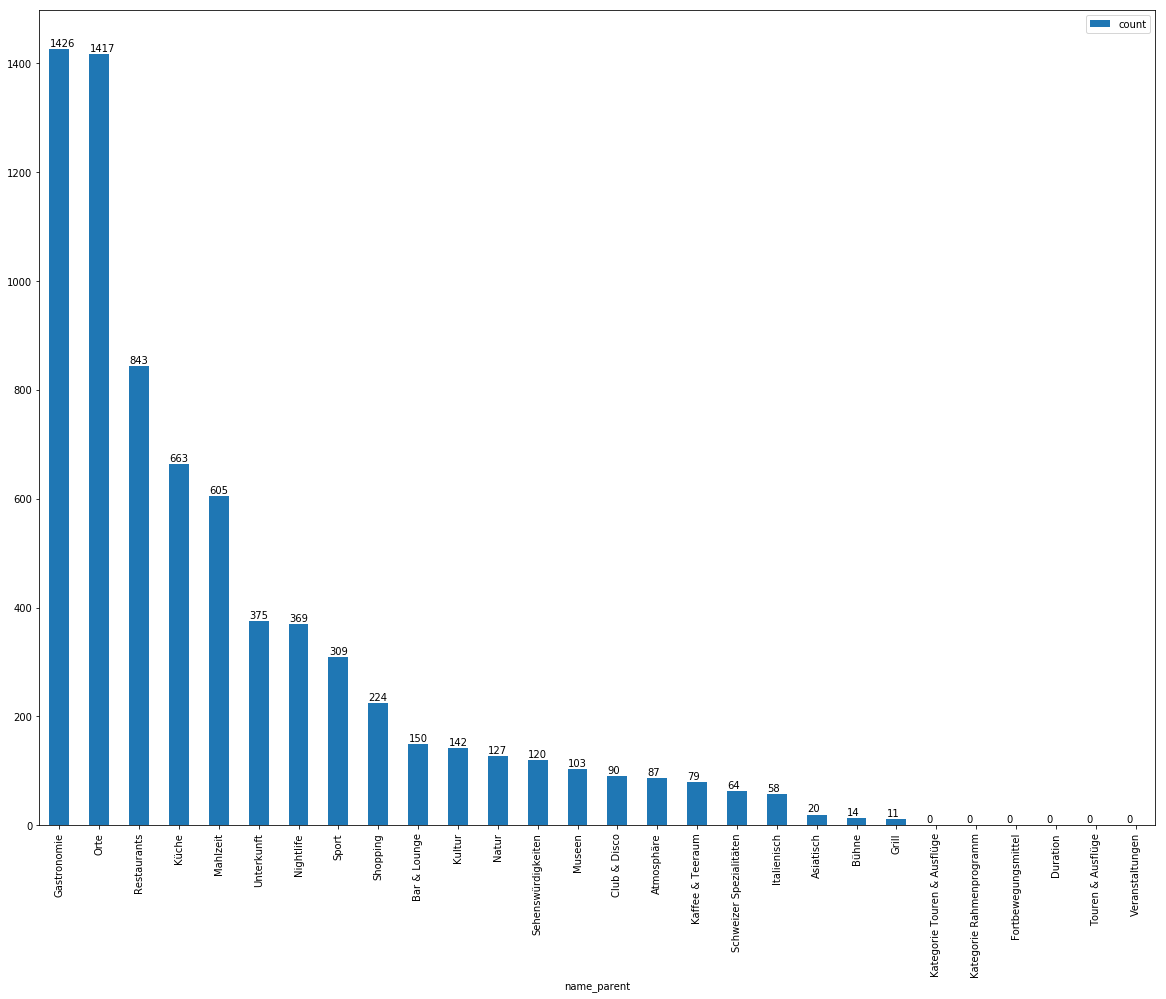

In [168]:
ax = aggregated_categories.plot.bar(figsize=(20,15))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.01, p.get_height() + 5))
ax